Basic plotting
===

This tutorial covers basic line plotting (Yt plots) and scatter plots (XY plots)

Yt plots are convenient for anything where the x-axis is fixed, for example time. This type of data is common for experiments where a variable like temperature is measured over time:

<img style="float:left" src="F1.png" width="300" >
<div style="clear: both;"></div>

In addition, most characterization techniques also have a manipulated input or measurement which is fixed, for example 2$\theta$ in X-ray diffraction or wavenumber shift [cm$^{-1}$] in Raman spectroscopy.

<br>
<img style="float:left" src="F2.jpg" width="300">
<div style="clear: both;"></div>

XY plots are used to compare two experimental variables for a set of experiments, for example glass transition temperature and softening point:

<img style="float:left" src="F3.jpg" width="300">
<div style="clear: both;"></div>

The objective here is to demonstrate how easy it is to visualize these types of data in Python. While you can do it in Excel, there are several issues. 

Firstly, clear communication. For report or scientific paper writing it makes life easier if everything is in a standard format which everyone can easily understand. The standard Excel plots are usually not suitable for scientific data making them difficult to read, not to mention the fact that everyone has their favourite type of plot which can misrepresent certain types of data making them difficult to interpret. 

Secondly, consistency. If you set up a nice plot with proper scalings, annotations, legends, subsampling and so on, you will need to redo it each time you have a slightly different data set. This becomes very tedious! Imagine having to reformat the XRD, Raman, FTIR and TGA characterizations you might do to all look the same... With Python your graphs will always feel consistent and there will be harmony across your paper or report. 

Another problem with Excel is large data sets, if you conducted an experiment over a day it becomes difficult to handle the information and plots can take several annoying minutes to display, even when copied to Word.

The most important reason however, is data munging or wrangling. Experiments never go as you thought they would, there are always small problems that arise: a not so clever colleague that disturbs the rig or a data collector that crashes. This is true of any real world data set. One of the most painful tasks on planet earth is correcting multiple, large data sets in Excel for minor glitches. In Python there are many ways in which data can be visualized in an interactive manner so you can play with it, change it, figure it out and come to clear conclusions. These topics are covered in the advanced tutorial.

This tutorial is aimed at making your life easier by giving you a quick 5 minute tour of plots and giving you a reference which you can easily use again and again to visualize your data sensibly.

Importing raw data
===

In our labs the most common data type is Yt. We use National Instruments hardware and LabView as the data capturing software. There are about a million ways to store data, one of the simplest and most common is something called a .csv or comma separated value file. The name says it all, values are measured at a given instance in time, logged and each one is separated using a comma. The comma is known as the "delimiter", anything can be used as a delimiter including spaces and tabs. To keep things simple the collector stores the date as the first column and time as the second followed by up to eight measured values. Note there are no variable or column names, known as a header, instead data starts from the beginning of the file. This is a standard across all experiments and uses the VI: "Logging 1 Task M Chan.vi". 

To import the data you can read it directly into a Python script using the Numpy command *genfromtxt* or the equivalent Pandas command *read_csv*. In this tutorial we will only consider the Numpy route.

In [12]:
import pandas
df = pandas.read_csv('YtData.csv')

The next step should be to take your first look at the data:

In [13]:
df.head()

,2016/09/01,11:57:07.953,21.611999361956,20.957304085420,20.965174662665,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2016/09/01,11:57:08.953,21.611783,20.956856,20.960560,NaN,NaN,NaN,NaN,NaN
1,2016/09/01,11:57:09.953,21.619216,20.972395,20.971238,NaN,NaN,NaN,NaN,NaN
2,2016/09/01,11:57:10.953,21.607956,20.959971,20.970620,NaN,NaN,NaN,NaN,NaN
3,2016/09/01,11:57:11.953,21.622204,21.011033,20.970524,NaN,NaN,NaN,NaN,NaN
4,2016/09/01,11:57:12.953,21.614377,49.136454,20.977508,NaN,NaN,NaN,NaN,NaN


We can do a little better than this! Pandas expects headings in the data file to give good names to things, and it also can parse the dates and times correctly as a timestamp, so let's add some options to the reading command:

In [26]:
df = pandas.read_csv('YtData.csv', header=None, usecols=range(5), names=['date', 'time', 'Water', 'PCM', 'Ambient'],
                     #parse_dates=[[0, 1]], index_col='date_time')
                     )

In [27]:
df.head()

,date,time,Water,PCM,Ambient
0,2016/09/01,11:57:07.953,21.611999,20.957304,20.965175
1,2016/09/01,11:57:08.953,21.611783,20.956856,20.960560
2,2016/09/01,11:57:09.953,21.619216,20.972395,20.971238
3,2016/09/01,11:57:10.953,21.607956,20.959971,20.970620
4,2016/09/01,11:57:11.953,21.622204,21.011033,20.970524


The next step is a basic plot, we can see that this data set only contains three measurements as the remaining columns are blanks or NaN (not a number). The preferred option for plotting is the Matplotlib package *pyplot*.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

The inline command causes the plots to appear in the Notebook rather than popping out for some basic interaction. Lets have a look.

Pandas allows for quick plotting of the data frame directly

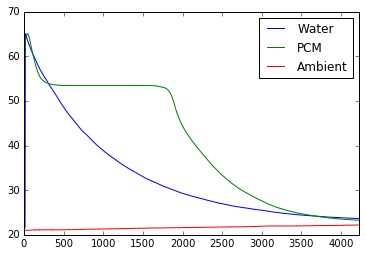

In [29]:
df.plot()

This data set looks quite good, however if you zoom in on the left you will see that there is some unwanted data which was generated at the start of the experiment.

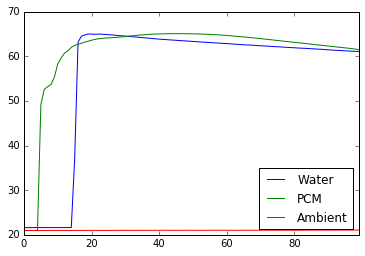

In [31]:
df[:100].plot()

During the start of the experiment the thermocouple was moved from its storage location at ambient temperature into a position within the sample. This is not strictly part of the experiment so we would like to remove this piece of the data, methods to do so are covered in the advanced tutorial. In this discussion we assume you have your final dataset and you just want to plot it to display your awesome results in your paper, report or presentation.

So now lets make our data as pretty as ... well, a picture! They say it is worth a thousand words...

Yt Plotting
===

Ambient temperature (the red line, 3rd data column) didn't change much so for now we'll ignore it. When plotting experimental data it is convention to use data markers. The markers indicate that this a discretely measured value for a given experiment. This is as opposed to a model for example which generates a prediction of the data. The prediction would be continuous since we can calculate it for any value of the independent variable. Therefore predictions are usually plotted as continuous lines and experimental data as individual points. First we have to tell Python to plot these markers:


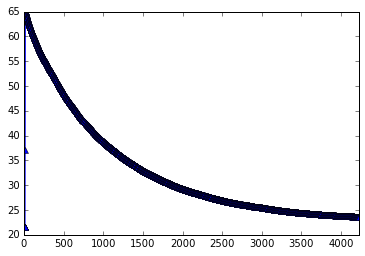

In [36]:
df.Water.plot(marker='^');

The marker can have any colour and a number of shapes, a list can be found here http://matplotlib.org/api/markers_api.html

The problem with most Yt data sets is that in order to accurately detect any changes occurring in the measurement, the resolution must be set very high. In this case the sampling frequency is set to every second but the data set was gathered over an hour, meaning there are thousands of individual measurements. Luckily Python has an easy way of dealing with this, called subsampling. This is done by setting the *markerevery=n* argument, which means every *nth* data point is plotted.

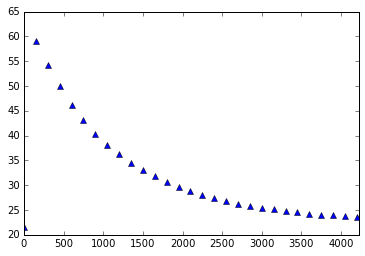

In [38]:
df.Water.plot(marker='^', linestyle='', markevery=150);

Try achieving that as quickly in Excel! Sometimes if there are multiple data sets which are not smooth, for example a calculation based on the derivative of temperature, it is a good idea to include a continuous line with the markers. This makes it easier to see trends in the data, compare:

<img style="float:left" src="F4b.png" width="300">
<div style="clear: both;"></div>
<br>
To:
<br>
<img style="float:left" src="F4.png" width="300">
<div style="clear: both;"></div>

This is done by adding an extra dash to the marker argument '-k^'. The next step is to add a legend so we can identify each plot. To do this each line must be identified with its own label. In this experiment the first temperature is the reference material, water, and the second is the sample, a phase change material, PCM for short. Then when we display the legend, the curves will automatically be labeled.

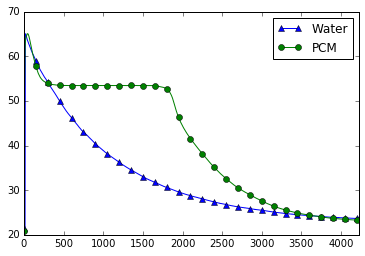

In [46]:
df[['Water', 'PCM']].plot(markevery=150, style=['-^', '-o'])

The legend has a variety of adjustable options all of which can be found here: http://matplotlib.org/users/legend_guide.html
The final step is to set cosmetic items such as the axis labels, axis scaling, axis intervals, font sizes and so on. The lines themselves also have a variety of adjustable options which are listed online: http://matplotlib.org/api/lines_api.html

In [49]:
import numpy as np

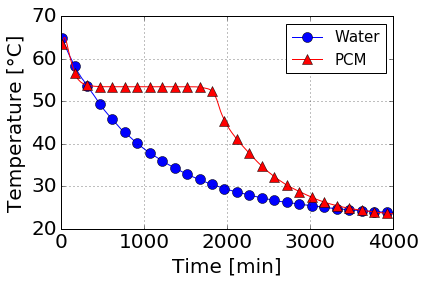

In [63]:
gooddata = df[20:][['Water', 'PCM']]
gooddata.plot(markevery=150, markersize=10, style=['-bo', '-r^'])
plt.legend(loc=1, numpoints = 1, fontsize=20, prop={'size':15})
plt.ylabel(u'Temperature [°C]', fontsize=20)
plt.xlabel('Time [min]', fontsize=20)
plt.xlim(0,4000)
plt.grid()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xticks(np.linspace(0,4000,5));
plt.tight_layout();

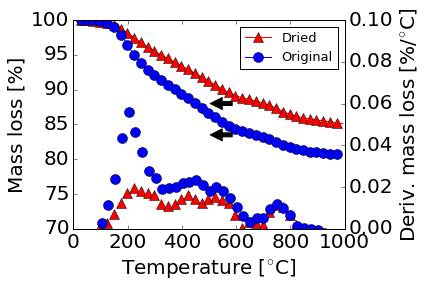

In [12]:
rawdata = np.genfromtxt('Tseries.csv', comments="#", delimiter=",")
plt.figure()
m1 = rawdata[:,1]/rawdata[300,1]*100
m2 = rawdata[:,3]/rawdata[10,3]*100
dm1 = np.diff(m1)/np.diff(rawdata[:,0])*(-1)-0.008
dm2 = np.diff(m2)/np.diff(rawdata[:,2])*(-1)
plt.plot(rawdata[:,0], m1, '-r^', markevery=300, markersize=10, label='Dried')
plt.plot(rawdata[:,0], m2, '-bo', markevery=300, markersize=10, label='Original')
plt.ylim(70,100)
plt.xlim(90,650)
plt.ylabel('Mass loss [%]', fontsize=20)
plt.xlabel('Temperature [$^{\circ}$C]', fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.annotate('', xy=(500, 88), xytext=(590, 88), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(500, 83.5), xytext=(590, 83.5), fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom',)
plt.legend(loc=1, numpoints = 1, fontsize=18, prop={'size':13})
ax1 = plt.gca()
ax2 = ax1.twinx()
plt.plot(rawdata[:-1,0], dm1, 'r^', markevery=300, markersize=10)
plt.plot(rawdata[:-1,2], dm2-0.006, 'bo', markevery=300, markersize=10)
plt.ylabel('Deriv. mass loss [%/$^{\circ}$C]', fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.ylim(0,0.1)
plt.tight_layout();

In such cases it is good practice to add an annotation. An annotation is a specific additional piece of text or a marker, in this case an arrow, which gives additional information. Sometimes it is not obvious which data axis belongs to which data set, in this case it makes it easier for the reader if we add an arrow from the data pointing to the relevant axis. To include text simply add it in-between the quotation marks ' '.

XY Plotting
===

Another common data type is tabular data for a specific set of experiments. In this case for example a single experiment is conducted at certain conditions and the result is logged. Then the experiment is repeated under slightly different conditions and again the result is noted. The most convenient way to keep track of such experiments is a spreadsheet. One such spreadsheet is shown below:

<img src="F5.png">

In total six experiments were conducted, in some cases the experiment was repeated up to six times. In this case seven variables were measured for each of the experiments. This data is for a solar radiation capture experiment using different starting materials. In addition, the sheet contains an all important "Comments" column, this is a space were specific information about that run can be recorded. This is especially valuable later during data analysis when the decision can be made whether the data set is to be pruned, if the comments contain a note that something went wrong this can be done without losing valuable information.

***
===

**To ensure the data collected by every student is formatted in the same way it is COMPULSORY that you use the spreadsheet "RawData.xlsx" when recording your experiments!!** This sheet complements your logbook which contains more detailed information for inclusion into your final documentation. Both must be submitted before your report or thesis will be considered for examination. This also holds for situations where Yt data was collected, in that case each experiment in the sheet is accompanied by a .csv data file numbered accordingly.

***
===

Now that we have the data we need to get it into Python so we can start coming to some brilliant conclusions!
The first step is conversion into a comma separated value file. To do this, go to the Excel File menu, click on *Save As*. Then from the drop down menu "Save as type" select **CSV (Comma delimited) (*.csv)**. When prompted that your file contains features which may be incompatible, simply select **Yes**.
This creates a .csv file which is very similar to the one created by LabView, to import it we again use the Numpy command *genfromtxt*

In [13]:
rawdata_XY = np.genfromtxt('RawData.csv', delimiter=",")

It is worth mentioning that Excel can easily open a .csv file, when opening, simply select **All Files (***.***)** from the drop down menu and then choose comma as the delimiter if needed. 

This time it is important to remember that the file contains a header or a segment which has information regarding each of the columns. We can get Python to ignore this section by adding the argument *skip_header=3*, which ignores the top three lines. However, if you are aware of this extra information we can just ignore it when visualizing. So lets take our first look at the data:

In [14]:
print(rawdata_XY[3:8,:])

[[  1.00000000e+00   1.00000000e+00   1.11000000e+01   6.21000000e+01
    2.43000000e+01   2.00000000e+00   9.00000000e-01   3.03030000e-01
    6.00000000e+02              nan              nan              nan]
 [  1.00000000e+00   2.00000000e+00   1.18000000e+01   6.35000000e+01
    2.53000000e+01   2.00000000e+00   9.00000000e-01   3.03030000e-01
    6.00000000e+02              nan              nan              nan]
 [  1.00000000e+00   3.00000000e+00   1.29000000e+01   6.54000000e+01
    2.54000000e+01   2.00000000e+00   9.00000000e-01   3.03030000e-01
    6.00000000e+02              nan              nan              nan]
 [  1.00000000e+00   4.00000000e+00   1.78000000e+01   5.76000000e+01
    2.84000000e+01   2.00000000e+00   9.00000000e-01   3.03030000e-01
    6.00000000e+02              nan              nan              nan]
 [  1.00000000e+00   5.00000000e+00   2.17000000e+01   5.90000000e+01
    3.21000000e+01   2.00000000e+00   9.00000000e-01   3.03030000e-01
    6.00000000e+

So far so good, the first column is the experiment number, second the repeat, third the first variable, etc. While Matplotlib does have a scatter plot option (*plt.scatter*) which some specific functionality, it is convenient to keep using the usual plot function with markers, for example:

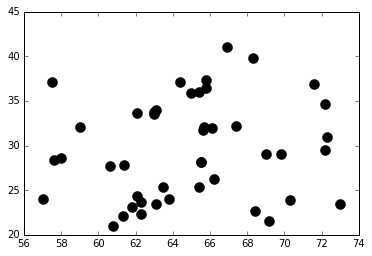

In [15]:
plt.plot(rawdata_XY[3::,3], rawdata_XY[3::,4], 'ko', markersize=10);

In this case we are comparing the final temperature of the experiment to the incident light flux. For this data there does not seem to be any correlation. What about the duration of the experiment, column 9?

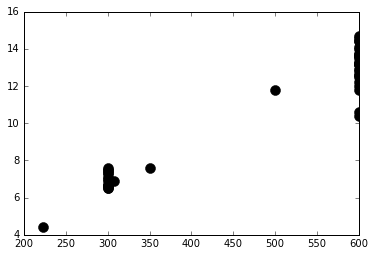

In [16]:
plt.plot(rawdata_XY[3::,8], rawdata_XY[3::,4]-rawdata_XY[3::,2], 'ko', markersize=10);

Ah-ha! Now we are on to something! Although it is not entirely surprising that the longer you heat something the hotter it gets?! Similar to Excel it is also very easy to add a trend line or curve fit (linear or otherwise). To keep it completely generic we add our own function which is a linear expression (y = m*x + c) and determine the two parameters, m and c, in this case x is the experimental time. This does require the ScyPy module optimize:

In [17]:
import scipy.optimize as opt

Optimization terminated successfully.
         Current function value: 27.588163
         Iterations: 80
         Function evaluations: 150


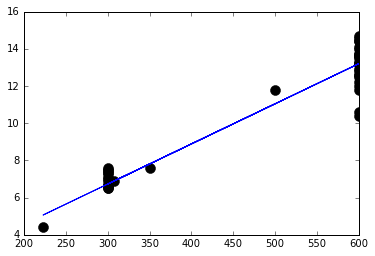

In [18]:
#First define our x and y variables
DeltaT = rawdata_XY[3::,4]-rawdata_XY[3::,2]
ExpTime = rawdata_XY[3::,8]

#Define our error function: in this case it is our prediction minus the real value
def dofit(params):
    err = abs((ExpTime*(params[0])+params[1])-DeltaT)
    err_tot = np.sum(err)
    return err_tot 

#Do the fit
fit_params = opt.fmin(dofit, [0, 0], ftol=0.1, maxiter = 100);

#Create the fit preditcion
y_fit = fit_params[0]*ExpTime+fit_params[1]

#Plot data and fit
plt.plot(ExpTime, DeltaT, 'ko', markersize=10);
plt.plot(ExpTime, y_fit);

The calculation of the delta temperature is but one of an infinite number of calculations we could do. We can calculate the mass of the sample or the overall heating duty. We can then plot these new variables to gain more insight into our experimental results. Advanced tools allow us to visualize the data in many ways that make finding new relationships easy, thereby increasing our understanding of the process or phenomena. You'll find these tools in the advanced tutorial. 

Once you have your final set of variables, which can be raw measurements or calculations, we can apply the same "beautification" process we applied earlier to arrive at our standard plot which we can conveniently use to represent all our experimental data and convey our message to the reader. For the most part this involves adding labels, legends and annotations.

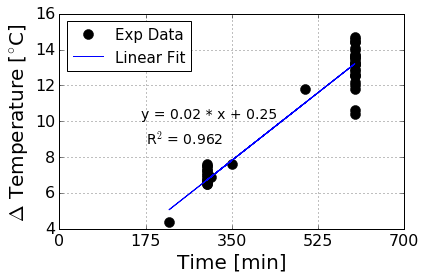

In [19]:
plt.plot(ExpTime, DeltaT, 'ko', markersize=10, label='Exp Data');
plt.plot(ExpTime, y_fit, label='Linear Fit');
plt.legend(loc=0, numpoints = 1, fontsize=20, prop={'size':15})
plt.ylabel('$\Delta$ Temperature [$^{\circ}$C]', fontsize=20)
plt.xlabel('Time [min]', fontsize=20)
plt.xlim(0,650)
plt.grid()
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xticks(np.linspace(0,700,5));
Rsqr = 'R$^2$ = '+str(round(np.corrcoef(DeltaT,y_fit)[0,1],3))
fit_str = 'y = '+str(round(fit_params[0],2))+' * x + '+str(round(fit_params[1],2))
plt.annotate(fit_str, xy=(165, 10), fontsize=14, arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom',)
plt.annotate(Rsqr, xy=(175, 8.5), fontsize=14, arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom',)
plt.tight_layout();

Now you can easily convince everyone you did some excellent work!

One last item which is of cardinal importance when plotting repeat experiments namely: the uncertainty bars. To plot these an experiment must have been repeated a minimum of three times. Based on this an average value and standard deviation can be calculated. One standard deviation above and below the average represents the 95% confidence interval (**not** the 96% data interval for a normal distribution, i.e. 2${\sigma}$). To add this to a plot we use the *plt.errorbar* function. For example, in the previous tests, experiment 1,2 and 3 were each repeated five times. Lets plot the final temperatures for these three experiments with their uncertainties:

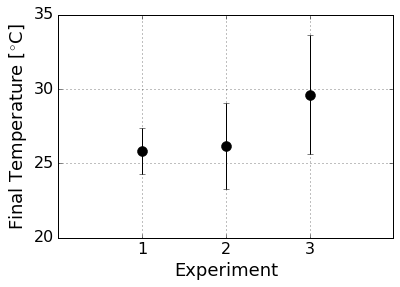

In [24]:
#Define the three experiments
x_data = [1,2,3]
y_data = [0,0,0]
y_err = [0,0,0]
#Calculate the average values of the final temperature (Column 5) for each of the 5 repeats for each experiment
y_data[0] = np.mean(rawdata_XY[3:7,4])
y_data[1] = np.mean(rawdata_XY[8:12,4])
y_data[2] = np.mean(rawdata_XY[13:17,4])
#Calculate the standard deviations 
y_err[0] = np.std(rawdata_XY[3:7,4])
y_err[1] = np.std(rawdata_XY[8:12,4])
y_err[2] = np.std(rawdata_XY[13:17,4])
#Plot
plt.plot(x_data, y_data, 'ko', markersize=10);
#Add errorbars
plt.errorbar(x_data, y_data, yerr=y_err, ecolor='k', linestyle="None")
#Beatify
plt.ylabel('Final Temperature [$^{\circ}$C]', fontsize=18)
plt.xlabel('Experiment', fontsize=18)
plt.ylim(20,35)
plt.xlim(0,4)
plt.grid()
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.yticks([20, 25, 30, 35])
plt.xticks([1, 2, 3]);

We have covered many ways in which to clearly and consistently communicate your results, well done! But now there is no excuse for plotting your results in a way no one can understand (despite sometimes wanting to) or to find trends which are somewhat too... artistic?

<img style="float:left"  src="F6.png">
<div style="clear: both;"></div>

